In [1]:
import pandas as pd
import datacleaning as dc
import seaborn as sns
school = pd.read_csv('../data/California_School_District_Areas_2018-19.csv')
funding = pd.read_excel('../data/financialinfo.xlsx')

In [2]:
school_1 = dc.clean(school) 
school = dc.dataprep(school_1)

In [3]:
funding['SchoolName'] = funding['District Name'].str.split('(')
funding['SchoolName'] = [x[0].rstrip() for x in funding.SchoolName]
#funding['SchoolName'] = [ str.rstrip()

In [4]:
merged = school.merge(funding, on = 'SchoolName', how = 'inner')

In [5]:
merged.tail()

,Year,CountyName,SchoolName,GradeLow,GradeHigh,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,AfricanAmericanPct,AmericanIndianPct,AsianPct,FilipinoPct,HispanicPct,MultipleRacePct,PacificIslanderPct,WhitePct,RaceNotReportedPct,EnglishLearnerPct,FosterPct,HomelessPct,MigrantPct,DisabilityPct,SocioEconDisadvantagePct,ELAStdMetPct,AbsentPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area,smallenrollment,mediumenrollment,largeenrollment,xlenrollment,charterpct,noncharterpct,unified,elem,high,suburban,rural,town,city,Locale,assistance,target,District Name,County Name (District),District Type (District),Current Exp of Educ per ADA (Ed Code 41372) (District)
963,2018-19,Yuba,Camptonville Elementary,KG,12,03,04,03,22,1.2,1.7,0.4,0.2,17.500000,10.6,0.6,66.500000,1.2,1.5,0.6,0.2,0.0,14.8,54.700001,68.800003,5.4,552.0,1.4,79862.488656,2.462935e+08,0,1,0,0,90.020790,9.979210,0,1,0,0,0,0,0,Suburban,1,1,Camptonville Elementary (Yuba),Yuba,Elementary School District,17375.0
964,2018-19,Yuba,Marysville Joint Unified,KG,12,"01,03",04,"01,03",22,3.5,2.4,8.8,0.5,43.299999,3.8,0.4,36.500000,0.9,21.9,0.9,1.6,0.6,11.3,79.400002,36.900002,10.6,10830.0,6.1,349629.046956,2.028548e+09,0,0,0,1,5.712597,94.287403,1,0,0,0,0,0,0,Suburban,1,0,Marysville Joint Unified (Yuba),Yuba,Unified School District,11837.0
965,2018-19,Yuba,Plumas Lake Elementary,KG,8,03,04,03,31,3.0,0.5,5.7,1.2,26.799999,11.0,0.4,51.299999,0.2,5.9,1.2,0.2,0.0,9.1,37.200001,58.599998,5.1,1482.0,5.3,87661.104071,1.626634e+08,0,1,0,0,0.000000,100.000000,0,1,0,0,0,0,0,NaN,0,0,Plumas Lake Elementary (Yuba),Yuba,Elementary School District,10016.0
966,2018-19,Yuba,Wheatland,KG,8,03,04,03,31,5.1,0.6,1.6,1.0,26.100000,10.4,0.9,54.299999,0.0,6.2,0.2,1.2,0.1,11.5,47.400002,51.500000,5.8,1509.0,2.9,143419.536122,5.138135e+08,0,1,0,0,7.060519,92.939481,0,1,0,0,0,0,0,NaN,0,0,Wheatland (Yuba),Yuba,Elementary School District,12875.0
967,2018-19,Yuba,Wheatland Union High,07,12,03,04,03,41,3.1,1.5,3.4,1.8,28.200001,11.7,0.5,48.900002,0.9,1.8,1.1,0.9,0.0,12.5,44.500000,50.500000,13.2,873.0,7.3,158205.506594,6.764769e+08,0,1,0,0,0.000000,100.000000,0,0,1,0,1,0,0,Rural,0,0,Wheatland Union High (Yuba),Yuba,High School District,12435.0


In [6]:
merged['ELAPercent'] = school_1['ELAStdMetPct']



In [7]:
merged.rename(columns=
           {'Current Exp of Educ per ADA (Ed Code 41372) (District)': 'ExpensePP'},
            inplace = True)
merged

,Year,CountyName,SchoolName,GradeLow,GradeHigh,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,AfricanAmericanPct,AmericanIndianPct,AsianPct,FilipinoPct,HispanicPct,MultipleRacePct,PacificIslanderPct,WhitePct,RaceNotReportedPct,EnglishLearnerPct,FosterPct,HomelessPct,MigrantPct,DisabilityPct,SocioEconDisadvantagePct,ELAStdMetPct,AbsentPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area,smallenrollment,mediumenrollment,largeenrollment,xlenrollment,charterpct,noncharterpct,unified,elem,high,suburban,rural,town,city,Locale,assistance,target,District Name,County Name (District),District Type (District),ExpensePP,ELAPercent
0,2018-19,Alameda,Alameda Unified,KG,12,13,09,18,21,7.3,0.2,25.299999,6.1,17.400000,11.6,0.6,28.799999,2.6,14.2,0.2,0.6,0.0,11.4,31.299999,69.400002,9.4,11600.0,2.6,57196.403944,4.733304e+07,0,0,0,1,16.669627,83.330373,1,0,0,1,0,0,0,Suburban,1,1,Alameda Unified (Alameda),Alameda,Unified School District,13070.0,69.400002
1,2018-19,Alameda,Albany City Unified,KG,12,13,09,15,21,3.0,0.1,28.900000,1.3,16.100000,13.9,0.2,31.600000,5.1,15.8,0.1,0.3,0.0,8.5,21.100000,79.199997,6.4,3830.0,1.9,12870.772156,7.161276e+06,0,0,1,0,0.000000,100.000000,1,0,0,1,0,0,0,Suburban,0,1,Albany City Unified (Alameda),Alameda,Unified School District,13150.0,79.199997
2,2018-19,Alameda,Berkeley Unified,KG,12,13,09,15,12,14.1,0.2,7.200000,0.8,23.900000,14.4,0.1,39.200001,0.1,9.3,0.2,2.6,0.0,11.3,32.700001,66.699997,9.7,10534.0,1.4,44426.287405,4.376389e+07,0,0,0,1,3.757112,96.242888,1,0,0,0,0,0,1,City,1,1,Berkeley Unified (Alameda),Alameda,Unified School District,17043.0,66.699997
3,2018-19,Alameda,Castro Valley Unified,KG,12,"13,15","07,09,10","18,20",21,5.3,0.2,27.400000,4.5,23.799999,9.8,0.5,26.799999,1.7,11.0,0.1,0.7,0.0,8.6,24.600000,68.099998,7.4,9532.0,2.2,142338.494091,2.833205e+08,0,0,0,1,0.000000,100.000000,1,0,0,1,0,0,0,Suburban,0,1,Castro Valley Unified (Alameda),Alameda,Unified School District,11436.0,68.099998
4,2018-19,Alameda,Emery Unified,KG,12,13,09,15,21,30.0,0.1,11.200000,1.5,24.900000,8.3,1.1,9.000000,0.0,21.5,0.1,0.9,0.0,7.4,80.800003,37.099998,20.5,780.0,3.6,13762.869292,5.368212e+06,0,1,0,0,0.000000,100.000000,1,0,0,1,0,0,0,Suburban,1,0,Emery Unified (Alameda),Alameda,Unified School District,18339.0,37.099998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,2018-19,Yuba,Camptonville Elementary,KG,12,03,04,03,22,1.2,1.7,0.400000,0.2,17.500000,10.6,0.6,66.500000,1.2,1.5,0.6,0.2,0.0,14.8,54.700001,68.800003,5.4,552.0,1.4,79862.488656,2.462935e+08,0,1,0,0,90.020790,9.979210,0,1,0,0,0,0,0,Suburban,1,1,Camptonville Elementary (Yuba),Yuba,Elementary School District,17375.0,NaN
964,2018-19,Yuba,Marysville Joint Unified,KG,12,"01,03",04,"01,03",22,3.5,2.4,8.800000,0.5,43.299999,3.8,0.4,36.500000,0.9,21.9,0.9,1.6,0.6,11.3,79.400002,36.900002,10.6,10830.0,6.1,349629.046956,2.028548e+09,0,0,0,1,5.712597,94.287403,1,0,0,0,0,0,0,Suburban,1,0,Marysville Joint Unified (Yuba),Yuba,Unified School District,11837.0,NaN
965,2018-19,Yuba,Plumas Lake Elementary,KG,8,03,04,03,31,3.0,0.5,5.700000,1.2,26.799999,11.0,0.4,51.299999,0.2,5.9,1.2,0.2,0.0,9.1,37.200001,58.599998,5.1,1482.0,5.3,87661.104071,1.626634e+08,0,1,0,0,0.000000,100.000000,0,1,0,0,0,0,0,NaN,0,0,Plumas Lake Elementary (Yuba),Yuba,Elementary School District,10016.0,NaN
966,2018-19,Yuba,Wheatland,KG,8,03,04,03,31,5.1,0.6,1.600000,1.0,26.100000,10.4,0.9,54.299999,0.0,6.2,0.2,1.2,0.1,11.5,47.400002,51.500000,5.8,1509.0,2.9,143419.536122,5.138135e+08,0,1,0,0,7.060519,92.939481,0,1,0,0,0,0,0,NaN,0,0,Wheatland (Yuba),Yuba,Elementary School District,12875.0,NaN


In [8]:
merged.loc[merged['ExpensePP'] >= 50000, 'ExpensePP'] = 50000

-0.0418093796057903

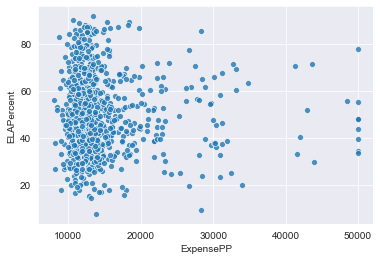

In [9]:
sns.scatterplot(y = 'ELAPercent', x = 'ExpensePP', data = merged, alpha = 0.8)
merged.ExpensePP.corr(merged.ELAPercent)

In [10]:
merged.groupby('target')['ExpensePP'].mean()

target
0    14589.122421
1    13921.887446
Name: ExpensePP, dtype: float64

In [11]:
merged.assistance.value_counts()

0    657
1    311
Name: assistance, dtype: int64